In [34]:
from IPython.display import Image
from IPython.core.display import HTML

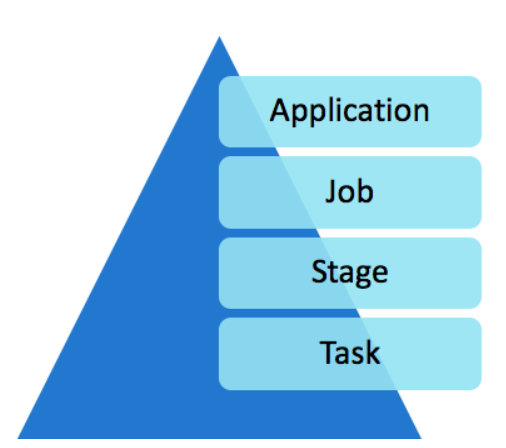

In [44]:
PATH = "C:\\Users\\Suraj\\"
Image(filename = PATH + "SparkExecutionAnatomy.PNG", width=250, height=250)

- Application: When we submit the Spark code to a cluster it creates a Spark Application.
- Job: The Job is the top-level execution for any Spark application. A Job corresponds to an Action in a Spark application.
- Stage: Jobs will be divided into stages. The Transformations work in a lazy fashion and will not be executed until an Action is called. Actions might include one or many Transformations and the Transformations define the breakdown of jobs into stages, which corresponds to a shuffle dependency.
- Stages will be further divided into various tasks. The task is the most granular unit in Spark applications. Each task represents a local computation on a particular node in the Spark Cluster.

Apache Spark works in a master-slave architecture where the master is called “Driver” and slaves are called “Workers”. The starting point of your Spark application is sc, a Spark Context Class instance. It runs inside the driver.

Apache Spark: Sometimes also called Spark Core. The Spark Core implementation is a RDD (Resilient Distributed Dataset) which is a collection of distributed data across different nodes of the cluster that are processed in parallel.

In [1]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.sql('''select 'spark' as hello ''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [2]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
import sys,tempfile, urllib
from pyspark.sql.functions import *

importing corona dataset

In [6]:
import os
BASE_DIR = 'C:\\Users\\Suraj\\PySpark'
CORONA_DATA_FILE = os.path.join(BASE_DIR, 'corona_data.csv')

In [7]:
corona_data = urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/coronavirus/corona_dataset_latest.csv', CORONA_DATA_FILE)

importing twitter dataset

In [8]:
BASE_DIR = 'C:\\Users\\Suraj\\PySpark'
TWITTER_DATA_FILE  = os.path.join(BASE_DIR, 'twitter_data.csv')
tweet_data = urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/coronavirus/tweets.csv', TWITTER_DATA_FILE)

In [10]:
os.getcwd()
    

'C:\\Users\\Suraj\\PySpark'

In [11]:
files = os.listdir(os.curdir)

In [12]:
files

['.ipynb_checkpoints',
 'corona_data.csv',
 'My First PySpark Notebook.ipynb',
 'twitter_data.csv']

In [13]:
#inferschema has to be set true so that spark infers the datatype of each feature otherwise all data will be set string
coronadf = spark.read.option("inferSchema","true").csv("C:\\Users\\Suraj\\PySpark\\corona_data.csv",header = True)

In [14]:
coronadf.show()

+---+----------------+--------------------+--------+---------+----------+---------+-----+---------+--------------------+----+
|_c0|           State|             Country|     Lat|     Long|      Date|Confirmed|Death|Recovered|       state_cleaned|City|
+---+----------------+--------------------+--------+---------+----------+---------+-----+---------+--------------------+----+
|  0|            null|            Thailand|    15.0|    101.0|2020-01-22|        2|    0|        0|             Bangkok|null|
|  1|            null|               Japan|    36.0|    138.0|2020-01-22|        2|    0|        0|             Hiraide|null|
|  2|            null|           Singapore|  1.2833| 103.8333|2020-01-22|        0|    0|        0|           Singapore|null|
|  3|            null|               Nepal| 28.1667|    84.25|2020-01-22|        0|    0|        0|           Kathmandu|null|
|  4|            null|            Malaysia|     2.5|    112.5|2020-01-22|        0|    0|        0|             Sarawa

In [15]:
coronadf.count()

28143

In [16]:
twitterdf = spark.read.option("inferSchema","True").csv("C:\\Users\\Suraj\\PySpark\\twitter_data.csv",header = True)

In [17]:
twitterdf.show()

+---+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0| geo|                text|                user|            location|            entities|           sentiment|             country|
+---+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|null|What is God sayin...|          petodinice|               Lagos|[('about #', 'CAR...|{'neg': 0.0, 'neu...|             Nigeria|
|  1|null|"BREAKING: ""this...| but i took the t...|                -… "|     JerryfranksonJF|      Abuja, Nigeria|"[(""Arsenal's Mi...|
|  2|null| #Coronavirus tes...|              cek422|   Pennsylvania, USA|                  []|{'neg': 0.173, 'n...|                 USA|
|  3|null| Get ready for ma...|        InfectiousDz|                 NYC|[('World', 'ORG')...|{'neg': 0.085, 'n...|                 USA|
|  4|null| The #coronavirus...|          

In [18]:
twitterdf.count()

1000

There are two types of operations performed on a RDD :

- Transformations: These operations work in a lazy fashion. When you apply a transformation on a RDD it will not be evaluated immediately but will only be stored in a DAG (Directed Acyclic Graph) and will be evaluated at some later point of time after an action is executed. Some common transformations are map, filter, flatMap, groupByKey, reduceByKey, etc.

- Actions: These operations will be executed immediately. Some common actions are first, last, count, collect, etc.

Transformations imply how we want to transform input data to desired form. The transformation functions take input and might result in aggregate data. Transformations creates directed acyclic graph which is the plan on how it wants to execute.
DAG knows to optimize the transformation. DAG does lazy evaluation. Unless the action is invoked the transformation won't start
the execution.

In [19]:
twitterdf.filter("country='USA'") #filter is a transformation => it just creates DAG and wait for actions

DataFrame[_c0: int, geo: string, text: string, user: string, location: string, entities: string, sentiment: string, country: string]

#### Fetch rows where country is USA

In [20]:
twitterdf.filter("country='USA'").show() #show is an action hence the transformation gets executed

+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------+
|_c0| geo|                text|           user|            location|            entities|           sentiment|country|
+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------+
|  2|null| #Coronavirus tes...|         cek422|   Pennsylvania, USA|                  []|{'neg': 0.173, 'n...|    USA|
|  3|null| Get ready for ma...|   InfectiousDz|                 NYC|[('World', 'ORG')...|{'neg': 0.085, 'n...|    USA|
|  5|null| COVID-19 update ...| StewartNgilana|Durban | Port Eli...|[('Italy', 'GPE')...|{'neg': 0.178, 'n...|    USA|
|  6|null| It’s painful to ...|      BWheatnyc|             Florida|                  []|{'neg': 0.098, 'n...|    USA|
|  8|null| Questions about ...|    straightj23|        Columbus, OH|[('NAfME', 'CARDI...|{'neg': 0.0, 'neu...|    USA|
| 13|null| We’re the heck w...| harrytiffanyiv| 

#### Fetch rows where country is USA and location starts with New

In [21]:
twitterdf.filter("country='USA' and location like 'New%'").show()

+---+----+--------------------+---------------+------------------+--------------------+--------------------+-------+
|_c0| geo|                text|           user|          location|            entities|           sentiment|country|
+---+----+--------------------+---------------+------------------+--------------------+--------------------+-------+
| 31|null| I ordered Alex J...|       rcgillan|     New York, USA|[('Alex Jones', '...|{'neg': 0.109, 'n...|    USA|
| 49|null| This week we are...|  JamesWithers3|New York, New York|[('This week', 'D...|{'neg': 0.0, 'neu...|    USA|
|228|null|This is a very co...|baskingntheGlow|     New York City|[('hourly', 'TIME')]|{'neg': 0.12, 'ne...|    USA|
|238|null|I’m reposting thi...|   Veronicaromm|   New Jersey, USA|[('English', 'LAN...|{'neg': 0.0, 'neu...|    USA|
|261|null|Too early ...?  #...|      HJeppesen|      New York, NY|                ['']|{'neg': 0.0, 'neu...|    USA|
|275|null|  The Republican ...|  GenetBataiile|New Hampshire, US

In [23]:
tw_filter_df=twitterdf.filter("country='USA'")

In [24]:
tw_filter_df.explain() #explain shows the executions plan of spark

== Physical Plan ==
*(1) Project [_c0#133, geo#134, text#135, user#136, location#137, entities#138, sentiment#139, country#140]
+- *(1) Filter (isnotnull(country#140) AND (country#140 = USA))
   +- FileScan csv [_c0#133,geo#134,text#135,user#136,location#137,entities#138,sentiment#139,country#140] Batched: false, DataFilters: [isnotnull(country#140), (country#140 = USA)], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/Suraj/PySpark/twitter_data.csv], PartitionFilters: [], PushedFilters: [IsNotNull(country), EqualTo(country,USA)], ReadSchema: struct<_c0:int,geo:string,text:string,user:string,location:string,entities:string,sentiment:strin...




In [26]:
tw_filter_df=twitterdf.filter("country='USA' and location like '%New%'")

In [27]:
tw_filter_df.explain()

== Physical Plan ==
*(1) Project [_c0#133, geo#134, text#135, user#136, location#137, entities#138, sentiment#139, country#140]
+- *(1) Filter (((isnotnull(country#140) AND isnotnull(location#137)) AND (country#140 = USA)) AND Contains(location#137, New))
   +- FileScan csv [_c0#133,geo#134,text#135,user#136,location#137,entities#138,sentiment#139,country#140] Batched: false, DataFilters: [isnotnull(country#140), isnotnull(location#137), (country#140 = USA), Contains(location#137, New)], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/Suraj/PySpark/twitter_data.csv], PartitionFilters: [], PushedFilters: [IsNotNull(country), IsNotNull(location), EqualTo(country,USA), StringContains(location,New)], ReadSchema: struct<_c0:int,geo:string,text:string,user:string,location:string,entities:string,sentiment:strin...




In [28]:
tw_filter_df.show()

+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------+
|_c0| geo|                text|           user|            location|            entities|           sentiment|country|
+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------+
| 31|null| I ordered Alex J...|       rcgillan|       New York, USA|[('Alex Jones', '...|{'neg': 0.109, 'n...|    USA|
| 49|null| This week we are...|  JamesWithers3|  New York, New York|[('This week', 'D...|{'neg': 0.0, 'neu...|    USA|
| 62|null|Fear will kill #C...| RobertPPurcell|norther New Jerse...|                ['']|{'neg': 0.798, 'n...|    USA|
|228|null|This is a very co...|baskingntheGlow|       New York City|[('hourly', 'TIME')]|{'neg': 0.12, 'ne...|    USA|
|238|null|I’m reposting thi...|   Veronicaromm|     New Jersey, USA|[('English', 'LAN...|{'neg': 0.0, 'neu...|    USA|
|261|null|Too early ...?  #...|      HJeppesen| 

In [29]:
tw_filter_df = twitterdf.filter(col('location').startswith('N'))

In [30]:
tw_filter_df.explain()

== Physical Plan ==
*(1) Project [_c0#133, geo#134, text#135, user#136, location#137, entities#138, sentiment#139, country#140]
+- *(1) Filter (isnotnull(location#137) AND StartsWith(location#137, N))
   +- FileScan csv [_c0#133,geo#134,text#135,user#136,location#137,entities#138,sentiment#139,country#140] Batched: false, DataFilters: [isnotnull(location#137), StartsWith(location#137, N)], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/Suraj/PySpark/twitter_data.csv], PartitionFilters: [], PushedFilters: [IsNotNull(location), StringStartsWith(location,N)], ReadSchema: struct<_c0:int,geo:string,text:string,user:string,location:string,entities:string,sentiment:strin...




In [31]:
tw_filter_df.show()

+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------------+
|_c0| geo|                text|           user|            location|            entities|           sentiment|      country|
+---+----+--------------------+---------------+--------------------+--------------------+--------------------+-------------+
|  3|null| Get ready for ma...|   InfectiousDz|                 NYC|[('World', 'ORG')...|{'neg': 0.085, 'n...|          USA|
|  7|null| 📽️Friends, I wi...|        LorseaR|New South Wales, ...|[('Twitter', 'GPE...|{'neg': 0.123, 'n...|    Australia|
| 31|null| I ordered Alex J...|       rcgillan|       New York, USA|[('Alex Jones', '...|{'neg': 0.109, 'n...|          USA|
| 36|null| Before #coronavi...|   Frankapistan|       Nashville, TN|[('China', 'GPE')...|{'neg': 0.144, 'n...|          USA|
| 49|null| This week we are...|  JamesWithers3|  New York, New York|[('This week', 'D...|{'neg': 0.0, 'neu...|          USA|
|

In [32]:
twitterdf.first()

Row(_c0=0, geo=None, text='What is God saying to us about #coronavirus ?', user='petodinice', location='Lagos', entities="[('about #', 'CARDINAL')]", sentiment="{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}", country='Nigeria')

In [33]:
twitterdf.take(5)

[Row(_c0=0, geo=None, text='What is God saying to us about #coronavirus ?', user='petodinice', location='Lagos', entities="[('about #', 'CARDINAL')]", sentiment="{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}", country='Nigeria'),
 Row(_c0=1, geo=None, text='"BREAKING: ""this is disappointing', user=' but i took the test"". Arsenal\'s Mikel Arteta tests positive for #coronavirus', location='  -… "', entities='JerryfranksonJF', sentiment='Abuja, Nigeria', country='"[(""Arsenal\'s Mikel Arteta""'),
 Row(_c0=2, geo=None, text=' #Coronavirus testing must be made free to the public if we are going to understand the scope of this crisis. Anything le…', user='cek422', location='Pennsylvania, USA', entities='[]', sentiment="{'neg': 0.173, 'neu': 0.71, 'pos': 0.117, 'compound': -0.3767}", country='USA'),
 Row(_c0=3, geo=None, text=' Get ready for mass event crowd cancellations across the World starting this weekend: cricket in #Australia in empty st…', user='InfectiousDz', locatio

### Narrow transformations

All elements required to compute the record are in single partition. The child RDD is mapped only to one parent RDD

### Wide transformations

Multiple child RDD partitions may depend on single parent RDD partition

### RDDs are immutable in nature, you cannot change RDDs. However, you can transform one RDD to another using various Transformations.

### Map vs flatMap

In [46]:
num = [1,2,3,4,5]
num_rdd = spark.sparkContext.parallelize(num)

In [47]:
num_rdd

ParallelCollectionRDD[67] at readRDDFromFile at PythonRDD.scala:262

In [48]:
x = spark.sparkContext.parallelize([1,2,3,4,5,6,7])
y = x.map(lambda x:(x,x*x))
print(x.collect())
print(y.collect())

[1, 2, 3, 4, 5, 6, 7]
[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49)]


In [49]:
x = spark.sparkContext.parallelize([1,2,3,4,5,6,7])
y = x.flatMap(lambda x:(x,x*x))
print(x.collect())
print(y.collect())

[1, 2, 3, 4, 5, 6, 7]
[1, 1, 2, 4, 3, 9, 4, 16, 5, 25, 6, 36, 7, 49]


#### Select required columns

SparkContext creates RDD
SparkSession creates DataFrame

In [50]:
twitterdf.select('text').show()

+--------------------+
|                text|
+--------------------+
|What is God sayin...|
|"BREAKING: ""this...|
| #Coronavirus tes...|
| Get ready for ma...|
| The #coronavirus...|
| COVID-19 update ...|
| It’s painful to ...|
| 📽️Friends, I wi...|
| Questions about ...|
|How they’re deali...|
| BREAKING: Democr...|
| “If we close dow...|
| I pity the poor ...|
| We’re the heck w...|
| I don't think sh...|
| Well written, so...|
| 1/2 CDC Director...|
| In all seriousne...|
| Wash your hands....|
| #CoronaVirusCana...|
+--------------------+
only showing top 20 rows



In [51]:
twitterdf.select('text','user').show()

+--------------------+--------------------+
|                text|                user|
+--------------------+--------------------+
|What is God sayin...|          petodinice|
|"BREAKING: ""this...| but i took the t...|
| #Coronavirus tes...|              cek422|
| Get ready for ma...|        InfectiousDz|
| The #coronavirus...|          vic_gibson|
| COVID-19 update ...|      StewartNgilana|
| It’s painful to ...|           BWheatnyc|
| 📽️Friends, I wi...|             LorseaR|
| Questions about ...|         straightj23|
|How they’re deali...|       _______coolio|
| BREAKING: Democr...|      champagneaylin|
| “If we close dow...|       YorkLawLondon|
| I pity the poor ...|      BeesonMargaret|
| We’re the heck w...|      harrytiffanyiv|
| I don't think sh...|         grammyheath|
| Well written, so...|      barbara_ellena|
| 1/2 CDC Director...|               fatal|
| In all seriousne...|          pwjkmiller|
| Wash your hands....|        Mrrandy123RP|
| #CoronaVirusCana...|           

#### Convert twitterdf to rdd and use map functions

In [52]:
twitterdf.rdd.map(lambda line:line.text.split(" ")).take(5)

[['What', 'is', 'God', 'saying', 'to', 'us', 'about', '#coronavirus', '?'],
 ['"BREAKING:', '""this', 'is', 'disappointing'],
 ['',
  '#Coronavirus',
  'testing',
  'must',
  'be',
  'made',
  'free',
  'to',
  'the',
  'public',
  'if',
  'we',
  'are',
  'going',
  'to',
  'understand',
  'the',
  'scope',
  'of',
  'this',
  'crisis.',
  'Anything',
  'le…'],
 ['',
  'Get',
  'ready',
  'for',
  'mass',
  'event',
  'crowd',
  'cancellations',
  'across',
  'the',
  'World',
  'starting',
  'this',
  'weekend:',
  'cricket',
  'in',
  '#Australia',
  'in',
  'empty',
  'st…'],
 ['',
  'The',
  '#coronavirus',
  'pandemic',
  'is',
  'revealing',
  'just',
  'how',
  'closely',
  'we',
  'are',
  'all',
  'bound',
  'together...[A',
  'thread]',
  '']]

In [54]:
twitterdf.rdd.flatMap(lambda line:line.text.split(" ")).take(20)

['What',
 'is',
 'God',
 'saying',
 'to',
 'us',
 'about',
 '#coronavirus',
 '?',
 '"BREAKING:',
 '""this',
 'is',
 'disappointing',
 '',
 '#Coronavirus',
 'testing',
 'must',
 'be',
 'made',
 'free']

### Cororna DF Analysis

In [55]:
coronadf.show()

+---+----------------+--------------------+--------+---------+----------+---------+-----+---------+--------------------+----+
|_c0|           State|             Country|     Lat|     Long|      Date|Confirmed|Death|Recovered|       state_cleaned|City|
+---+----------------+--------------------+--------+---------+----------+---------+-----+---------+--------------------+----+
|  0|            null|            Thailand|    15.0|    101.0|2020-01-22|        2|    0|        0|             Bangkok|null|
|  1|            null|               Japan|    36.0|    138.0|2020-01-22|        2|    0|        0|             Hiraide|null|
|  2|            null|           Singapore|  1.2833| 103.8333|2020-01-22|        0|    0|        0|           Singapore|null|
|  3|            null|               Nepal| 28.1667|    84.25|2020-01-22|        0|    0|        0|           Kathmandu|null|
|  4|            null|            Malaysia|     2.5|    112.5|2020-01-22|        0|    0|        0|             Sarawa

In [56]:
coronadf.filter("country='US'").sort(col('Date'),ascending = False).show()

+-----+----------------+-------+------------------+---------+----------+---------+-----+---------+----------------+----------------+
|  _c0|           State|Country|               Lat|     Long|      Date|Confirmed|Death|Recovered|   state_cleaned|            City|
+-----+----------------+-------+------------------+---------+----------+---------+-----+---------+----------------+----------------+
|27764|      Washington|     US|           47.4009|-121.4905|2020-03-20|     1524|   83|        0|      Washington|      Washington|
|27784|         Arizona|     US|           33.7298|-111.4312|2020-03-20|       78|    0|        0|         Arizona|         Arizona|
|27765|        New York|     US|           42.1657| -74.9481|2020-03-20|     8310|   42|        0|        New York|        New York|
|27766|      California|     US|           36.1162|-119.6816|2020-03-20|     1177|   23|        0|      California|      California|
|27767|   Massachusetts|     US|           42.2302| -71.5301|2020-03-

In [58]:
coronadf.filter("country='US'").orderBy(col('Date'),ascending = False).show()

+-----+----------------+-------+------------------+---------+----------+---------+-----+---------+----------------+----------------+
|  _c0|           State|Country|               Lat|     Long|      Date|Confirmed|Death|Recovered|   state_cleaned|            City|
+-----+----------------+-------+------------------+---------+----------+---------+-----+---------+----------------+----------------+
|27764|      Washington|     US|           47.4009|-121.4905|2020-03-20|     1524|   83|        0|      Washington|      Washington|
|27784|         Arizona|     US|           33.7298|-111.4312|2020-03-20|       78|    0|        0|         Arizona|         Arizona|
|27765|        New York|     US|           42.1657| -74.9481|2020-03-20|     8310|   42|        0|        New York|        New York|
|27766|      California|     US|           36.1162|-119.6816|2020-03-20|     1177|   23|        0|      California|      California|
|27767|   Massachusetts|     US|           42.2302| -71.5301|2020-03-

In [59]:
#Operations happen within a partition to avoid data movements
coronadf.filter("country='US'").sortWithinPartitions([col('Date'),col('Confirmed')],ascending = False).show()

+-----+--------------+-------+-------+---------+----------+---------+-----+---------+--------------+--------------+
|  _c0|         State|Country|    Lat|     Long|      Date|Confirmed|Death|Recovered| state_cleaned|          City|
+-----+--------------+-------+-------+---------+----------+---------+-----+---------+--------------+--------------+
|27765|      New York|     US|42.1657| -74.9481|2020-03-20|     8310|   42|        0|      New York|      New York|
|27764|    Washington|     US|47.4009|-121.4905|2020-03-20|     1524|   83|        0|    Washington|    Washington|
|27766|    California|     US|36.1162|-119.6816|2020-03-20|     1177|   23|        0|    California|    California|
|27773|    New Jersey|     US|40.2989|  -74.521|2020-03-20|      890|   11|        0|    New Jersey|    New Jersey|
|27776|      Illinois|     US|40.3495| -88.9861|2020-03-20|      585|    5|        0|      Illinois|      Illinois|
|27772|       Florida|     US|27.7663| -81.6868|2020-03-20|      563|   

In [60]:
coronadf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Death: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- state_cleaned: string (nullable = true)
 |-- City: string (nullable = true)



In [61]:
coronadf.filter('Confirmed > 10000').sort(col('Confirmed')).show()

+-----+------+-------+-------+--------+----------+---------+-----+---------+-------------+----+
|  _c0| State|Country|    Lat|    Long|      Date|Confirmed|Death|Recovered|state_cleaned|City|
+-----+------+-------+-------+--------+----------+---------+-----+---------+-------------+----+
|24005|  null|   Iran|   32.0|    53.0|2020-03-12|    10075|  429|     2959|       Tehran|null|
|22912|  null|  Italy|   43.0|    12.0|2020-03-10|    10149|  631|      724|         Rome|null|
|27346|France| France|46.2276|  2.2137|2020-03-19|    10871|  243|       12|       France|null|
| 5401| Hubei|  China|30.9756|112.2707|2020-02-02|    11177|  350|      295|        Hubei|null|
|24482|  null|   Iran|   32.0|    53.0|2020-03-13|    11364|  514|     2959|       Tehran|null|
|26253|  null|  Spain|   40.0|    -4.0|2020-03-17|    11748|  533|     1028|       Toledo|null|
|26723|  null|Germany|   51.0|     9.0|2020-03-18|    12327|   28|      105|       Berlin|null|
|23866|  null|  Italy|   43.0|    12.0|2

In [62]:
coronadf.agg({"Date":"max"}).collect()

[Row(max(Date)='2020-03-20')]

In [63]:
import pyspark.sql.functions as F

In [64]:
#Groupby Country and state_cleaned by max date
coronadf.groupBy("Country","State_cleaned").agg(F.max("Date")).show()

+--------------+--------------------+----------+
|       Country|       State_cleaned| max(Date)|
+--------------+--------------------+----------+
|      Cameroon|             Yaounde|2020-03-20|
|         China|             Qinghai|2020-03-20|
|        Cyprus|             Nicosia|2020-03-20|
|            US|            Michigan|2020-03-20|
|      Portugal|              Lisbon|2020-03-20|
|            US|            Colorado|2020-03-20|
|United Kingdom|      Cayman Islands|2020-03-20|
|         China|              Hainan|2020-03-20|
|            US|            Missouri|2020-03-20|
|     Australia|Australian Capita...|2020-03-20|
|            US|                Guam|2020-03-20|
|        France|             Reunion|2020-03-20|
|      Colombia|        Cundinamarca|2020-03-20|
|          Cuba|              Havana|2020-03-20|
|     Mauritius|          Port Louis|2020-03-20|
|       Ukraine|                Kiev|2020-03-20|
|         Benin|          Porto-Novo|2020-03-20|
|   Switzerland|    

In [65]:
coronadf.join(coronadf.groupBy("Country","State_cleaned").agg(F.max("Date").alias('Date')),on = ['Country','State_cleaned','Date'],how='inner').show()

+--------------------+--------------------+----------+-----+----------------+--------+---------+---------+-----+---------+----+
|             Country|       state_cleaned|      Date|  _c0|           State|     Lat|     Long|Confirmed|Death|Recovered|City|
+--------------------+--------------------+----------+-----+----------------+--------+---------+---------+-----+---------+----+
|            Thailand|             Bangkok|2020-03-20|27666|            null|    15.0|    101.0|      322|    1|       42|null|
|               Japan|             Hiraide|2020-03-20|27667|            null|    36.0|    138.0|      963|   33|      191|null|
|           Singapore|           Singapore|2020-03-20|27668|            null|  1.2833| 103.8333|      385|    0|      124|null|
|               Nepal|           Kathmandu|2020-03-20|27669|            null| 28.1667|    84.25|        1|    0|        1|null|
|            Malaysia|             Sarawak|2020-03-20|27670|            null|     2.5|    112.5|     103

In [66]:
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

#Partition the data by Country and StateCleaned and order by date descending which is the recent date
ws=Window().partitionBy("Country","State_cleaned").orderBy(col("Date").desc())

#row number for every row
coronadf.withColumn("row_num", row_number().over(ws)).show()

+-----+-----+--------+------------------+-------+----------+---------+-----+---------+-------------+----+-------+
|  _c0|State| Country|               Lat|   Long|      Date|Confirmed|Death|Recovered|state_cleaned|City|row_num|
+-----+-----+--------+------------------+-------+----------+---------+-----+---------+-------------+----+-------+
|27745| null|Cameroon|3.8480000000000003|11.5021|2020-03-20|       20|    0|        0|      Yaounde|null|      1|
|27268| null|Cameroon|3.8480000000000003|11.5021|2020-03-19|       13|    0|        0|      Yaounde|null|      2|
|26791| null|Cameroon|3.8480000000000003|11.5021|2020-03-18|       10|    0|        0|      Yaounde|null|      3|
|26314| null|Cameroon|3.8480000000000003|11.5021|2020-03-17|       10|    0|        0|      Yaounde|null|      4|
|25837| null|Cameroon|3.8480000000000003|11.5021|2020-03-16|        4|    0|        0|      Yaounde|null|      5|
|25360| null|Cameroon|3.8480000000000003|11.5021|2020-03-15|        2|    0|        0|  

In [68]:
coronadf.withColumn("row_num", row_number().over(ws)).where(col("row_num")==1).show()

+-----+--------------------+--------------+------------------+---------+----------+---------+-----+---------+--------------------+--------+-------+
|  _c0|               State|       Country|               Lat|     Long|      Date|Confirmed|Death|Recovered|       state_cleaned|    City|row_num|
+-----+--------------------+--------------+------------------+---------+----------+---------+-----+---------+--------------------+--------+-------+
|27745|                null|      Cameroon|3.8480000000000003|  11.5021|2020-03-20|       20|    0|        0|             Yaounde|    null|      1|
|27859|             Qinghai|         China|           35.7452|  95.9956|2020-03-20|       18|    0|       18|             Qinghai|    null|      1|
|27762|                null|        Cyprus|           35.1264|  33.4299|2020-03-20|       67|    0|        0|             Nicosia|    null|      1|
|27812|            Michigan|            US|           43.3266| -84.5361|2020-03-20|      552|    3|        0|   

In [70]:
coronadf.groupby("Country").pivot("Date").agg(F.sum("Confirmed")).show()

+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|    Country|2020-01-22|2020-01-23|2020-01-24|2020-01-25|2020-01-26|2020-01-27|2020-01-28|2020-01-29|2020-01-30|2020-01-31|2020-02-01|2020-02-02|2020-02-03|2020-02-04|2020-02-05|2020-02-06|2020-02-07|2020-02-08|2020-02-09|2020-02-10|2020-02-11|2020-02-12|2020-02-13|2020-02-14|2020-02-15|2020-02-16|2020-02-17|2020-02-18|2020-02-19|2020-

In [71]:
coronadf.filter("Country=='US'").crosstab("State","Date").show()

+-------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|         State_Date|2020-01-22|2020-01-23|2020-01-24|2020-01-25|2020-01-26|2020-01-27|2020-01-28|2020-01-29|2020-01-30|2020-01-31|2020-02-01|2020-02-02|2020-02-03|2020-02-04|2020-02-05|2020-02-06|2020-02-07|2020-02-08|2020-02-09|2020-02-10|2020-02-11|2020-02-12|2020-02-13|2020-02-14|2020-02-15|2020-02-16|2020-02-17|2020-02-18|

In [72]:
coronadf.filter("Country=='Italy'").sort("Date",ascending=False).show()

+-----+-----+-------+----+----+----------+---------+-----+---------+-------------+----+
|  _c0|State|Country| Lat|Long|      Date|Confirmed|Death|Recovered|state_cleaned|City|
+-----+-----+-------+----+----+----------+---------+-----+---------+-------------+----+
|27682| null|  Italy|43.0|12.0|2020-03-20|    47021| 4032|     4440|         Rome|null|
|27205| null|  Italy|43.0|12.0|2020-03-19|    41035| 3405|     4440|         Rome|null|
|26728| null|  Italy|43.0|12.0|2020-03-18|    35713| 2978|     4025|         Rome|null|
|26251| null|  Italy|43.0|12.0|2020-03-17|    31506| 2503|     2941|         Rome|null|
|25774| null|  Italy|43.0|12.0|2020-03-16|    27980| 2158|     2749|         Rome|null|
|25297| null|  Italy|43.0|12.0|2020-03-15|    24747| 1809|     2335|         Rome|null|
|24820| null|  Italy|43.0|12.0|2020-03-14|    21157| 1441|     1966|         Rome|null|
|24343| null|  Italy|43.0|12.0|2020-03-13|    17660| 1266|     1439|         Rome|null|
|23866| null|  Italy|43.0|12.0|2

In [73]:
coronadf.withColumn("Active",coronadf.Confirmed - coronadf.Recovered - coronadf.Death).sort("Active",ascending=False).show()

+-----+-----+-------+-------+--------+----------+---------+-----+---------+-------------+----+------+
|  _c0|State|Country|    Lat|    Long|      Date|Confirmed|Death|Recovered|state_cleaned|City|Active|
+-----+-----+-------+-------+--------+----------+---------+-----+---------+-------------+----+------+
|13033|Hubei|  China|30.9756|112.2707|2020-02-18|    61682| 1921|     9128|        Hubei|null| 50633|
|12556|Hubei|  China|30.9756|112.2707|2020-02-17|    59989| 1789|     7862|        Hubei|null| 50338|
|12079|Hubei|  China|30.9756|112.2707|2020-02-16|    58182| 1696|     6639|        Hubei|null| 49847|
|13510|Hubei|  China|30.9756|112.2707|2020-02-19|    62031| 2029|    10337|        Hubei|null| 49665|
|11602|Hubei|  China|30.9756|112.2707|2020-02-15|    56249| 1596|     5623|        Hubei|null| 49030|
|14464|Hubei|  China|30.9756|112.2707|2020-02-21|    62662| 2144|    11881|        Hubei|null| 48637|
|13987|Hubei|  China|30.9756|112.2707|2020-02-20|    62442| 2144|    11788|       